## Advanced Regression - Surprise Housing - Assignment 

## 1. Data Understanding and Exploration

In [2241]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

# Supressing warnings
import warnings
warnings.filterwarnings('ignore')


In [2242]:
# reading the dataset
houses = pd.read_csv("D:/Sushma/Data Science/Advanced Regression Assignment/train.csv")

In [2243]:
# summary of the dataset
print(houses.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [2244]:
# Checking the head of the data set
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2245]:
# Checking the number of columns and number of records in the data frame
houses.shape

(1460, 81)

In [2246]:
# Checking the statistics of all the numeric columns in the data frame
houses.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [2247]:
# Removing duplicate records if any
houses.drop_duplicates(inplace=True)

In [2248]:
# Checking the number of columns and number of records in the data frame
houses.shape

(1460, 81)

In [2249]:
#Checking the head of the data set
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 2. Data Cleaning

In [2250]:
# Checking for null values in the columns
houses.isnull().sum().sort_values(ascending=False).sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtCond           37
BsmtQual           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
RoofStyle           0
MSZoning            0
BsmtFinSF1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
LotConfig           0
YearBuilt           0
Utilities           0
                 ... 
BsmtHalfBath        0
BsmtFullBath        0
GrLivArea           0
LowQualFinSF        0
2ndFlrSF            0
1stFlrSF            0
CentralAir          0
SaleCondition       0
Heating             0
YrSold              0
MoSold              0
MiscVal             0
Fireplaces          0
LotShape            0
LandContou

In [2251]:
# Checking the column-wise null percentages here
round(100*(houses.isnull().sum()/len(houses.index)),2).sort_values(ascending=False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Utilities         0.00
YearRemodAdd      0.00
MSSubClass        0.00
Foundation        0.00
ExterCond         0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
RoofMatl          0.00
RoofStyle         0.00
YearBuilt         0.00
                 ...  
GarageArea        0.00
PavedDrive        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
3SsnPorch         0.00
BsmtUnfSF         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
Functional 

In [2252]:
#Dropping the columns which have more than or equal to 30% of null values

#As the columns with more than 70% values which are not null are to be retained,threshold is set to 'len(houses) * .7'
thresh = len(houses) * .7

houses.dropna(thresh = thresh, axis = 1, inplace = True)

In [2253]:
# Checking the column-wise null percentages here
round(100*(houses.isnull().sum()/len(houses.index)),2).sort_values(ascending=False)

LotFrontage      17.74
GarageFinish      5.55
GarageType        5.55
GarageCond        5.55
GarageQual        5.55
GarageYrBlt       5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrType        0.55
MasVnrArea        0.55
Electrical        0.07
RoofStyle         0.00
RoofMatl          0.00
SalePrice         0.00
Exterior1st       0.00
Exterior2nd       0.00
YearBuilt         0.00
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
YearRemodAdd      0.00
BldgType          0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
Condition2        0.00
Condition1        0.00
                 ...  
GarageArea        0.00
PavedDrive        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
3SsnPorch         0.00
BsmtUnfSF         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
Functional 

In [2254]:
#Imputing missing values with the median based on other column

houses['LotFrontage'].fillna(houses.groupby('Neighborhood')['LotFrontage'].transform("median"),inplace=True)
houses['GarageFinish'].fillna("No Garage",inplace=True)
houses['GarageType'].fillna("No Garage",inplace=True)
houses['GarageCond'].fillna("No Garage",inplace=True)
houses['GarageQual'].fillna("No Garage",inplace=True)
houses['GarageYrBlt'].fillna(houses['YrSold'],inplace=True)
houses['BsmtExposure'].fillna("No Basement",inplace=True)
houses['BsmtFinType1'].fillna("No Basement",inplace=True)
houses['BsmtFinType2'].fillna("No Basement",inplace=True)
houses['BsmtCond'].fillna("No Basement",inplace=True)
houses['BsmtQual'].fillna("No Basement",inplace=True)
houses['MasVnrType'].fillna(houses['MasVnrType'].mode()[0],inplace=True)
houses['Electrical'].fillna(houses['Electrical'].mode()[0],inplace=True)
houses['MasVnrArea'].fillna(houses.groupby('MasVnrType')['MasVnrArea'].transform("median"),inplace=True)

In [2255]:
# Checking the column-wise null percentages here
round(100*(houses.isnull().sum()/len(houses.index)),2).sort_values(ascending=False)

SalePrice        0.0
ExterCond        0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
Foundation       0.0
SaleCondition    0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
YearRemodAdd     0.0
YearBuilt        0.0
OverallCond      0.0
OverallQual      0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
                ... 
WoodDeckSF       0.0
OpenPorchSF      0.0
EnclosedPorch    0.0
3SsnPorch        0.0
ScreenPorch      0.0
PoolArea         0.0
MiscVal          0.0
MoSold           0.0
YrSold           0.0
SaleType         0.0
GarageFinish     0.0
GarageType       0.0
HeatingQC        0.0
Fireplaces       0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF     

In [2256]:
#Dropping Id column as it is not useful for the analysis or model bulding
houses = houses.drop(['Id'],axis=1) 

In [2257]:
#Checking count of records for each value in the column
houses['3SsnPorch'].value_counts()

0      1436
168       3
216       2
144       2
180       2
245       1
238       1
290       1
196       1
182       1
407       1
304       1
162       1
153       1
320       1
140       1
130       1
96        1
23        1
508       1
Name: 3SsnPorch, dtype: int64

In [2258]:
#As more than 90% of the columns are 0,there is no significant variance in the values .so,dropping the column
houses = houses.drop(['3SsnPorch'],axis=1)

In [2259]:
#Checking count of records for each value in the column
houses['PoolArea'].value_counts()

0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

In [2260]:
#As more than 90% of the columns are 0,there is no significant variance in the values .so,dropping the column
houses = houses.drop(['PoolArea'],axis=1)

In [2261]:
#Checking count of records for each value in the column
houses['MiscVal'].value_counts()

0        1408
400        11
500         8
700         5
450         4
2000        4
600         4
1200        2
480         2
1150        1
800         1
15500       1
620         1
3500        1
560         1
2500        1
1300        1
1400        1
350         1
8300        1
54          1
Name: MiscVal, dtype: int64

In [2262]:
#As more than 90% of the columns are 0,there is no significant variance in the values .so,dropping the column
houses = houses.drop(['MiscVal'],axis=1)

In [2263]:
#Checking count of records for each value in the column
houses['ScreenPorch'].value_counts()

0      1344
192       6
224       5
120       5
189       4
180       4
160       3
168       3
144       3
126       3
147       3
90        3
200       2
198       2
216       2
184       2
259       2
100       2
176       2
170       2
288       2
142       2
153       1
154       1
152       1
155       1
145       1
156       1
143       1
322       1
       ... 
163       1
165       1
291       1
287       1
276       1
273       1
271       1
266       1
265       1
263       1
260       1
252       1
234       1
233       1
225       1
374       1
222       1
220       1
210       1
204       1
197       1
385       1
190       1
396       1
185       1
182       1
440       1
178       1
312       1
480       1
Name: ScreenPorch, Length: 76, dtype: int64

In [2264]:
#As more than 90% of the columns are 0,there is no significant variance in the values .so,dropping the column
houses = houses.drop(['ScreenPorch'],axis=1)

In [2265]:
#Checking count of records for each value in the column
houses['LowQualFinSF'].value_counts()

0      1434
80        3
360       2
528       1
53        1
120       1
144       1
156       1
205       1
232       1
234       1
371       1
572       1
390       1
392       1
397       1
420       1
473       1
479       1
481       1
513       1
514       1
515       1
384       1
Name: LowQualFinSF, dtype: int64

In [2266]:
#As more than 90% of the columns are 0,there is no significant variance in the values .so,dropping the column
houses = houses.drop(['LowQualFinSF'],axis=1)

In [2267]:
# Checking the column-wise null percentages here
round(100*(houses.isnull().sum()/len(houses.index)),2).sort_values(ascending=False)

SalePrice        0.0
ExterQual        0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterCond        0.0
YearBuilt        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
YearRemodAdd     0.0
OverallCond      0.0
SaleCondition    0.0
Utilities        0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
LotConfig        0.0
OverallQual      0.0
LandSlope        0.0
Neighborhood     0.0
                ... 
GarageFinish     0.0
GarageCars       0.0
GarageArea       0.0
GarageQual       0.0
PavedDrive       0.0
TotalBsmtSF      0.0
WoodDeckSF       0.0
OpenPorchSF      0.0
EnclosedPorch    0.0
MoSold           0.0
YrSold           0.0
SaleType         0.0
Fireplaces       0.0
Functional       0.0
TotRmsAbvGrd     0.0
KitchenQual      0.0
KitchenAbvGr 

## 3.Data Preparation

In [2268]:
# Checking the correlation between the variables data set
cor = houses.corr()
cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.370367,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,...,-0.045569,0.100178,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.013585,-0.021407,-0.084284
LotFrontage,-0.370367,1.000000,0.335957,0.239546,-0.043595,0.120999,0.084550,0.195830,0.232576,0.052237,...,0.249295,0.033968,0.281393,0.339085,0.088736,0.141734,0.008057,0.007370,0.004756,0.349876
LotArea,-0.139781,0.335957,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,...,0.271364,-0.043869,0.154871,0.180403,0.171698,0.084774,-0.018340,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.239546,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,...,0.396765,0.427702,0.600671,0.562022,0.238923,0.308819,-0.113937,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.043595,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,...,-0.023820,-0.297516,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.120999,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,...,0.147716,0.688917,0.537850,0.478954,0.224880,0.188686,-0.387268,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.084550,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,...,0.112581,0.564406,0.420622,0.371600,0.205726,0.226298,-0.193919,0.021490,0.035743,0.507101
MasVnrArea,0.023573,0.195830,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,...,0.247015,0.204559,0.361945,0.370884,0.159991,0.122528,-0.109907,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.069836,0.232576,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,...,0.260011,0.115517,0.224054,0.296970,0.204306,0.111761,-0.102303,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.052237,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,...,0.046921,-0.094577,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.015211,0.031706,-0.011378


In [2269]:
# Adding new colums Age,AgeRemod,AgeGarage derived from the columns YrSold,YearBuilt,YearRemodAdd,GarageYrBlt
houses['Age'] = houses['YrSold']-houses['YearBuilt']
houses['AgeRemod'] = houses['YrSold']-houses['YearRemodAdd']
houses['AgeGarage'] = houses['YrSold']-(houses['GarageYrBlt'])

In [2270]:
# Dropping the columns YrSold,YearBuilt,YearRemodAdd,GarageYrBlt
houses = houses.drop(['YrSold', 'YearBuilt','YearRemodAdd','GarageYrBlt'],axis=1)

In [2271]:
#Log transformation of the dependent variable SalePrice
houses['SalePrice']=np.log(houses['SalePrice'])

In [2272]:
#Checking the head of the data set
houses.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,SaleType,SaleCondition,SalePrice,Age,AgeRemod,AgeGarage
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,61,0,2,WD,Normal,12.247694,5,5,5.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,298,0,0,5,WD,Normal,12.109011,31,31,31.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,42,0,9,WD,Normal,12.317167,7,6,7.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,35,272,2,WD,Abnorml,11.849398,91,36,8.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,192,84,0,12,WD,Normal,12.429216,8,8,8.0


In [2273]:
# Checking the column-wise null percentages here
round(100*(houses.isnull().sum()/len(houses.index)),2).sort_values(ascending=False)

AgeGarage        0.0
ExterCond        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
Foundation       0.0
BsmtUnfSF        0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
RoofStyle        0.0
OverallCond      0.0
OverallQual      0.0
HouseStyle       0.0
BldgType         0.0
Condition2       0.0
Condition1       0.0
Neighborhood     0.0
LandSlope        0.0
LotConfig        0.0
Utilities        0.0
LandContour      0.0
LotShape         0.0
Street           0.0
                ... 
GarageArea       0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
OpenPorchSF      0.0
Heating          0.0
EnclosedPorch    0.0
MoSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Age              0.0
GarageType       0.0
Fireplaces       0.0
Functional       0.0
TotRmsAbvGrd     0.0
KitchenQual  

In [2274]:
#Checking the shape of the data set
houses.shape

(1460, 69)

In [2275]:
#Checking for outliers
houses.describe(percentiles=[0.05,0.25,0.5,0.75,0.95])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,SalePrice,Age,AgeRemod,AgeGarage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.199658,10516.828082,6.099315,5.575342,103.117123,443.639726,46.549315,567.240411,1057.429452,...,1.767123,472.980137,94.244521,46.660274,21.954110,6.321918,12.024051,36.547945,22.950000,27.680137
std,42.300571,22.431902,9981.264932,1.382997,1.112799,180.731373,456.098091,161.319273,441.866955,438.705324,...,0.747315,213.804841,125.338794,66.256028,61.119149,2.703626,0.399452,30.250152,20.640653,24.950144
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10.460242,0.000000,-1.000000,0.000000
5%,20.000000,35.000000,3311.700000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,519.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,11.385092,1.000000,0.000000,0.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,...,1.000000,334.500000,0.000000,0.000000,0.000000,5.000000,11.775097,8.000000,4.000000,4.000000
50%,50.000000,70.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,...,2.000000,480.000000,0.000000,25.000000,0.000000,6.000000,12.001505,35.000000,14.000000,23.500000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,...,2.000000,576.000000,168.000000,68.000000,0.000000,8.000000,12.273731,54.000000,41.000000,46.000000
95%,160.000000,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,...,3.000000,850.100000,335.000000,175.050000,180.150000,11.000000,12.694958,91.000000,58.000000,78.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,...,4.000000,1418.000000,857.000000,547.000000,552.000000,12.000000,13.534473,136.000000,60.000000,107.000000


In [2276]:
# Checking for outliers
houses[['LotArea','LotFrontage','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
            '1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF',
            'OpenPorchSF','EnclosedPorch']].describe(percentiles=[0.05,0.25,0.5,0.75,0.95])

,LotArea,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,70.199658,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,1515.463699,472.980137,94.244521,46.660274,21.954110
std,9981.264932,22.431902,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,525.480383,213.804841,125.338794,66.256028,61.119149
min,1300.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000
5%,3311.700000,35.000000,0.000000,0.000000,0.000000,0.000000,519.300000,672.950000,0.000000,848.000000,0.000000,0.000000,0.000000,0.000000
25%,7553.500000,60.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,334.500000,0.000000,0.000000,0.000000
50%,9478.500000,70.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,1464.000000,480.000000,0.000000,25.000000,0.000000
75%,11601.500000,80.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,576.000000,168.000000,68.000000,0.000000
95%,17401.150000,104.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,2466.100000,850.100000,335.000000,175.050000,180.150000
max,215245.000000,313.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,5642.000000,1418.000000,857.000000,547.000000,552.000000


In [2277]:
#Checking the shape of the data set
houses.shape

(1460, 69)

In [2278]:
# Removing the outliers
Q1 = houses['LotArea'].quantile(0.05)
Q3 = houses['LotArea'].quantile(0.95)
IQR=Q3-Q1
houses = houses.loc[(houses['LotArea']>=Q1)&(houses['LotArea']<=Q3+1.5*IQR)]
    

In [2279]:
#Checking the shape of the data set
houses.shape

(1372, 69)

In [2280]:
#Again checking for outliers
houses[['LotArea','LotFrontage','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
            '1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF',
            'OpenPorchSF','EnclosedPorch']].describe(percentiles=[0.05,0.25,0.5,0.75,0.95])

,LotArea,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,10171.779883,71.932945,99.353499,444.002187,45.666181,573.046647,1062.715015,1173.395044,338.415452,1517.854956,477.038630,93.068513,47.128280,23.325802
std,3976.577582,19.747427,175.837169,435.045980,159.882595,442.889021,414.628152,364.554525,439.616486,512.561338,214.085072,123.096505,65.993344,62.787587
min,3316.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000
5%,4967.600000,44.000000,0.000000,0.000000,0.000000,0.000000,529.100000,710.750000,0.000000,848.000000,0.000000,0.000000,0.000000,0.000000
25%,7915.250000,60.000000,0.000000,0.000000,0.000000,230.000000,813.000000,896.000000,0.000000,1127.500000,336.000000,0.000000,0.000000,0.000000
50%,9600.000000,70.000000,0.000000,391.000000,0.000000,485.000000,1004.000000,1095.500000,0.000000,1471.000000,483.500000,0.000000,26.000000,0.000000
75%,11645.000000,80.000000,160.000000,728.000000,0.000000,811.000000,1300.500000,1392.000000,728.000000,1790.500000,577.000000,168.000000,70.000000,0.000000
95%,16663.500000,104.450000,436.900000,1271.800000,391.000000,1485.150000,1753.000000,1833.250000,1146.050000,2470.250000,852.450000,330.250000,175.450000,184.450000
max,36500.000000,313.000000,1600.000000,2188.000000,1474.000000,2336.000000,3206.000000,3228.000000,2065.000000,4476.000000,1390.000000,736.000000,547.000000,552.000000


In [2281]:
# Removing the outliers
Q1 = houses['BsmtFinSF2'].quantile(0.05)
Q3 = houses['BsmtFinSF2'].quantile(0.95)
IQR=Q3-Q1
houses = houses.loc[(houses['BsmtFinSF2']>=Q1)&(houses['BsmtFinSF2']<=Q3)]

In [2282]:
#Checking the shape of the data set
houses.shape

(1304, 69)

In [2283]:
#Checking outliers
houses.describe(percentiles=[0.05,0.25,0.5,0.75,0.95])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,SalePrice,Age,AgeRemod,AgeGarage
count,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,...,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000
mean,52.519172,71.706672,10108.881135,6.104294,5.578988,102.078988,449.765337,13.360429,589.459356,1052.585123,...,1.778374,477.703988,92.345859,47.091258,22.808282,6.332822,12.030818,37.084356,23.055215,27.704755
std,36.915821,19.745756,3963.708611,1.403268,1.124575,178.570380,440.555973,56.553132,443.069872,410.301064,...,0.758148,216.381180,122.037829,65.321227,61.910353,2.739041,0.402065,31.072474,21.035219,25.469548
min,20.000000,24.000000,3316.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10.460242,0.000000,0.000000,0.000000
5%,20.000000,44.000000,4920.450000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,520.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,11.407565,1.000000,0.000000,0.000000
25%,20.000000,60.000000,7858.500000,5.000000,5.000000,0.000000,0.000000,0.000000,253.000000,801.500000,...,1.000000,336.000000,0.000000,0.000000,0.000000,5.000000,11.775290,7.000000,4.000000,4.000000
50%,50.000000,70.000000,9587.500000,6.000000,5.000000,0.000000,407.500000,0.000000,506.000000,992.000000,...,2.000000,484.000000,0.000000,27.000000,0.000000,6.000000,12.012488,35.000000,14.000000,21.500000
75%,60.000000,80.000000,11618.250000,7.000000,6.000000,165.250000,737.250000,0.000000,825.000000,1289.250000,...,2.000000,579.000000,168.000000,70.000000,0.000000,8.000000,12.278393,57.000000,43.000000,46.250000
95%,120.000000,103.850000,16533.150000,8.000000,8.000000,442.000000,1274.000000,118.700000,1493.250000,1751.100000,...,3.000000,855.550000,324.000000,171.700000,182.550000,11.000000,12.714468,92.000000,58.000000,79.000000
max,190.000000,313.000000,36500.000000,10.000000,9.000000,1600.000000,2188.000000,391.000000,2336.000000,3200.000000,...,4.000000,1390.000000,736.000000,547.000000,552.000000,12.000000,13.534473,136.000000,60.000000,107.000000


In [2284]:
#Checking the shape of the data set
houses.shape

(1304, 69)

In [2285]:
# Assigning values for two level categorical variables
houses['Street'] = houses['Street'].map({'Pave': 1, 'Grvl': 0})
houses['Utilities'] = houses['Utilities'].map({'AllPub': 1, 'NoSeWa': 0})

In [2286]:
# Creating a dummy variable for the categorical variables and dropping the first one.

MSSubClass = pd.get_dummies(houses['MSSubClass'],prefix='MSSubClass',drop_first=True)
MSZoning = pd.get_dummies(houses['MSZoning'],prefix='MSZoning',drop_first=True)
LotShape = pd.get_dummies(houses['LotShape'],prefix='LotShape',drop_first=True)
LandContour = pd.get_dummies(houses['LandContour'],prefix='LandContour',drop_first=True)
LotConfig = pd.get_dummies(houses['LotConfig'],prefix='LotConfig',drop_first=True)
LandSlope = pd.get_dummies(houses['LandSlope'],prefix='LandSlope',drop_first=True)
Neighborhood = pd.get_dummies(houses['Neighborhood'],prefix='Neighborhood',drop_first=True)
Condition1 = pd.get_dummies(houses['Condition1'],prefix='Condition1',drop_first=True)
Condition2 = pd.get_dummies(houses['Condition2'],prefix='Condition2',drop_first=True)
BldgType = pd.get_dummies(houses['BldgType'],prefix='BldgType',drop_first=True)
HouseStyle = pd.get_dummies(houses['HouseStyle'],prefix='HouseStyle',drop_first=True)
RoofStyle = pd.get_dummies(houses['RoofStyle'],prefix='RoofStyle',drop_first=True)
RoofMatl = pd.get_dummies(houses['RoofMatl'],prefix='RoofMatl',drop_first=True)
Exterior1st = pd.get_dummies(houses['Exterior1st'],prefix='Exterior1st',drop_first=True)
Exterior2nd = pd.get_dummies(houses['Exterior2nd'],prefix='Exterior2nd',drop_first=True)
MasVnrType = pd.get_dummies(houses['MasVnrType'],prefix='MasVnrType',drop_first=True)
ExterQual = pd.get_dummies(houses['ExterQual'],prefix='ExterQual',drop_first=True)
ExterCond = pd.get_dummies(houses['ExterCond'],prefix='ExterCond',drop_first=True)
Foundation = pd.get_dummies(houses['Foundation'],prefix='Foundation',drop_first=True)
BsmtQual = pd.get_dummies(houses['BsmtQual'],prefix='BsmtQual',drop_first=True)
BsmtCond = pd.get_dummies(houses['BsmtCond'],prefix='BsmtCond',drop_first=True)
BsmtExposure = pd.get_dummies(houses['BsmtExposure'],prefix='BsmtExposure',drop_first=True)
BsmtFinType1 = pd.get_dummies(houses['BsmtFinType1'],prefix='BsmtFinType1',drop_first=True)
BsmtFinType2 = pd.get_dummies(houses['BsmtFinType2'],prefix='BsmtFinType2',drop_first=True)
Heating = pd.get_dummies(houses['Heating'],prefix='Heating',drop_first=True)
HeatingQC = pd.get_dummies(houses['HeatingQC'],prefix='HeatingQC',drop_first=True)
CentralAir = pd.get_dummies(houses['CentralAir'],prefix='CentralAir',drop_first=True)
Electrical = pd.get_dummies(houses['Electrical'],prefix='Electrical',drop_first=True)
KitchenQual = pd.get_dummies(houses['KitchenQual'],prefix='KitchenQual',drop_first=True)
Functional = pd.get_dummies(houses['Functional'],prefix='Functional',drop_first=True)
GarageType = pd.get_dummies(houses['GarageType'],prefix='GarageType',drop_first=True)
GarageFinish = pd.get_dummies(houses['GarageFinish'],prefix='GarageFinish',drop_first=True)
GarageQual = pd.get_dummies(houses['GarageQual'],prefix='GarageQual',drop_first=True)
GarageCond = pd.get_dummies(houses['GarageCond'],prefix='GarageCond',drop_first=True)
PavedDrive = pd.get_dummies(houses['PavedDrive'],prefix='PavedDrive',drop_first=True)
SaleType = pd.get_dummies(houses['SaleType'],prefix='SaleType',drop_first=True)
SaleCondition = pd.get_dummies(houses['SaleCondition'],prefix='SaleCondition',drop_first=True)
MoSold = pd.get_dummies(houses['MoSold'],prefix='MoSold',drop_first=True)

In [2287]:
#Concatenating the dummy varaibles to the houses data set
houses = pd.concat([houses,MSSubClass,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,
                    Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,
                    MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,
                    Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,
                    GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,MoSold],axis=1)

In [2288]:
# Dropping the variables for which we have created dummies
houses=houses.drop(['MSSubClass','MSZoning','LotShape','LandContour','LotConfig','LandSlope','Neighborhood',
                    'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
                    'MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
                    'Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','GarageType',
                    'GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition','MoSold'],axis=1)

In [2289]:
#Checking the shape of houses
houses.shape

(1304, 253)

## 4.Test - Train Split

In [2290]:
#Importing the required libraries
from sklearn.model_selection import train_test_split

In [2291]:
# splitting the data set into train and test
houses_train, houses_test = train_test_split(houses, train_size = 0.7, test_size = 0.3, random_state = 100)

## 5.Feature Scaling

In [2292]:
from sklearn.preprocessing import StandardScaler

In [2293]:
#creating the standard scaler
scaler = StandardScaler()

In [2294]:
# Applying standard scaler to all the numeric columns of leads data set
num_vars = ['LotFrontage', 'LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch','SalePrice','Age','AgeRemod','AgeGarage']
houses_train[num_vars] = scaler.fit_transform(houses_train[num_vars])

In [2295]:
#Dividing train data set into x and y sets for the model building.
y_train = houses_train['SalePrice']
X_train = houses_train.drop(['SalePrice'], 1)

In [2296]:
#Checking the info
houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1304 entries, 0 to 1459
Columns: 253 entries, LotFrontage to MoSold_12
dtypes: float64(4), int64(27), uint8(222)
memory usage: 608.7 KB


## 6.Feature Selection Using RFE

In [2297]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [2298]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train = sm.add_constant(X_train)

In [2299]:
# Running the linear model
lm = LinearRegression()
lm = sm.OLS(y_train,X_train).fit() 

#Checking the summary
print(lm.summary()) 

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     56.04
Date:                Tue, 09 Jul 2019   Prob (F-statistic):               0.00
Time:                        18:07:30   Log-Likelihood:                 90.291
No. Observations:                 912   AIC:                             297.4
Df Residuals:                     673   BIC:                             1448.
Df Model:                         238                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [2300]:
# Running the RFE with 50 variables
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 50)             
rfe = rfe.fit(X_train, y_train)


In [2301]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True, False, False,  True, False,  True, False, False, False,
       False, False,

In [2302]:
# List of variables with the rfe ranking and the rfesupport status
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('const', False, 201),
 ('LotFrontage', False, 177),
 ('LotArea', False, 117),
 ('Street', False, 175),
 ('Utilities', False, 114),
 ('OverallQual', False, 98),
 ('OverallCond', False, 76),
 ('MasVnrArea', False, 195),
 ('BsmtFinSF1', False, 52),
 ('BsmtFinSF2', False, 56),
 ('BsmtUnfSF', False, 53),
 ('TotalBsmtSF', False, 54),
 ('1stFlrSF', False, 135),
 ('2ndFlrSF', False, 136),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 84),
 ('BsmtHalfBath', False, 204),
 ('FullBath', False, 128),
 ('HalfBath', False, 127),
 ('BedroomAbvGr', False, 189),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 194),
 ('Fireplaces', False, 139),
 ('GarageCars', False, 70),
 ('GarageArea', False, 137),
 ('WoodDeckSF', False, 180),
 ('OpenPorchSF', False, 200),
 ('EnclosedPorch', False, 198),
 ('Age', True, 1),
 ('AgeRemod', False, 171),
 ('AgeGarage', False, 183),
 ('MSSubClass_30', False, 67),
 ('MSSubClass_40', False, 109),
 ('MSSubClass_45', False, 11),
 ('MSSubClass_50', False, 199),
 ('MSSu

In [2303]:
# Storing the variables selected by RFE in col variable
X_train.columns[rfe.support_]

Index(['GrLivArea', 'KitchenAbvGr', 'Age', 'MSSubClass_160', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LandSlope_Sev',
       'Neighborhood_Crawfor', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Condition2_RRAe', 'HouseStyle_2.5Unf',
       'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_Metal',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'Exterior1st_BrkComm',
       'Exterior1st_CBlock', 'Exterior2nd_Brk Cmn', 'Exterior2nd_CBlock',
       'Foundation_Wood', 'BsmtCond_Po', 'BsmtExposure_Gd',
       'BsmtFinType1_No Basement', 'BsmtFinType2_No Basement', 'Heating_GasA',
       'Heating_GasW', 'Heating_Grav', 'Heating_Wall', 'CentralAir_Y',
       'Electrical_Mix', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA',
       'Functional_Maj2', 'GarageQual_Fa', 'GarageQual_Po', 'GarageQual_TA',
       'GarageCond_Fa', 'GarageCond_No Garage', 'GarageCond_TA',
  

In [2304]:
#Displaying variables selected by RFE
X_train.columns[~rfe.support_]

Index(['const', 'LotFrontage', 'LotArea', 'Street', 'Utilities', 'OverallQual',
       'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'MoSold_3', 'MoSold_4', 'MoSold_5', 'MoSold_6', 'MoSold_7', 'MoSold_8',
       'MoSold_9', 'MoSold_10', 'MoSold_11', 'MoSold_12'],
      dtype='object', length=203)

In [2305]:
X_train_rfe=X_train.columns[rfe.support_]
X_train_rfe.shape

(50,)

In [2306]:
X_train = X_train[X_train_rfe]

In [2307]:
# Adding constant to RFE selected data set
import statsmodels.api as sm  
X_train = sm.add_constant(X_train)

In [2308]:
# Running the linear model
lm = sm.OLS(y_train,X_train).fit()   

In [2309]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     156.2
Date:                Tue, 09 Jul 2019   Prob (F-statistic):               0.00
Time:                        18:07:38   Log-Likelihood:                -286.28
No. Observations:                 912   AIC:                             664.6
Df Residuals:                     866   BIC:                             886.1
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

## 7. Model Building

## Ridge Regression

In [2310]:
#Storing the features selected by RFE
features=X_train.columns
features

Index(['const', 'GrLivArea', 'KitchenAbvGr', 'Age', 'MSSubClass_160',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LandSlope_Sev', 'Neighborhood_Crawfor', 'Neighborhood_NridgHt',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Condition2_RRAe',
       'HouseStyle_2.5Unf', 'RoofStyle_Gable', 'RoofStyle_Gambrel',
       'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed',
       'RoofMatl_Metal', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake',
       'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior2nd_Brk Cmn',
       'Exterior2nd_CBlock', 'Foundation_Wood', 'BsmtCond_Po',
       'BsmtExposure_Gd', 'BsmtFinType1_No Basement',
       'BsmtFinType2_No Basement', 'Heating_GasA', 'Heating_GasW',
       'Heating_Grav', 'Heating_Wall', 'CentralAir_Y', 'Electrical_Mix',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'Functional_Maj2',
       'GarageQual_Fa', 'GarageQual_Po', 'GarageQual_TA', 'GarageCond_Fa',
       'GarageCond_No Garage', 'Ga

In [2311]:
# list of alphas to tune
params = {'alpha': [0.01, 0.1, 1, 5, 10,50,100]}


ridge = Ridge()

# cross validation
folds = 3
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.2s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.01, 0.1, 1, 5, 10, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [2312]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.008333,1.178594e-03,0.002500,1.946680e-07,0.01,{'alpha': 0.01},-0.270218,-0.271722,-0.278123,-0.273354,0.003427,3,-0.247572,-0.246524,-0.239643,-0.244580,0.003517
1,0.007500,2.041288e-03,0.003333,1.178482e-03,0.1,{'alpha': 0.1},-0.268838,-0.270537,-0.276834,-0.272070,0.003439,2,-0.248557,-0.247788,-0.241518,-0.245954,0.003152
2,0.007500,1.123916e-07,0.002500,1.123916e-07,1,{'alpha': 1},-0.267809,-0.267751,-0.278957,-0.271506,0.005269,1,-0.254660,-0.254621,-0.247909,-0.252397,0.003173
3,0.007500,1.123916e-07,0.002500,1.123916e-07,5,{'alpha': 5},-0.275825,-0.270695,-0.284850,-0.277123,0.005851,4,-0.267862,-0.267164,-0.258372,-0.264466,0.004318
4,0.007500,2.041191e-03,0.002500,0.000000e+00,10,{'alpha': 10},-0.283182,-0.273980,-0.289218,-0.282126,0.006266,5,-0.275486,-0.275580,-0.266022,-0.272363,0.004484


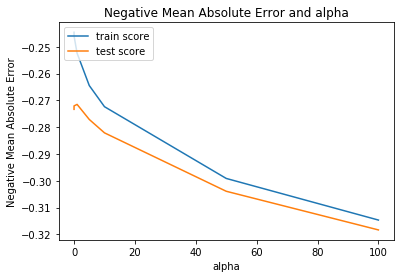

In [2313]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [2314]:
#Choosing the appropriate value of alpha and fitting the ridge regression
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.00000000e+00,  5.14866938e-01, -1.26612996e-01, -3.23954213e-01,
       -3.40929496e-02,  3.29045672e-02, -9.13703938e-03,  7.60740128e-02,
       -4.84743973e-02,  7.33272077e-05,  1.07134342e-01,  1.88590868e-01,
        7.52641792e-02,  5.28454809e-02, -6.85525347e-03,  2.05283163e-02,
       -8.51687986e-02,  1.19359446e-02,  7.33875774e-02,  2.21912527e-03,
       -4.40316692e-04,  5.41042654e-03, -7.34395857e-03, -2.86428378e-04,
       -2.58971295e-02, -3.77352037e-03, -2.58971295e-02, -3.77352037e-03,
       -6.81062150e-03, -8.59235798e-03,  1.66935735e-01, -1.16698087e-01,
       -1.16698087e-01,  2.45891135e-02,  2.01383311e-02, -2.81124178e-02,
       -1.07693056e-02,  1.39909732e-01, -8.59235798e-03, -8.60347162e-02,
        3.19116251e-03, -2.34010735e-01, -1.78372355e-02, -1.86874251e-02,
       -3.92126377e-03,  8.46624682e-02, -1.81586631e-02, -1.01713530e-01,
        1.29025505e-01,  1.76568939e-02,  9.09658908e-03])

In [2315]:
#Displaying the features with respective coefficient values
df = pd.DataFrame()
df['Feature Name'] = features
column_name= 'Alpha = %f' % alpha
df[column_name]=sorted(ridge.coef_,reverse=True)
df

,Feature Name,Alpha = 100.000000
0,const,0.514867
1,GrLivArea,0.188591
2,KitchenAbvGr,0.166936
3,Age,0.139910
4,MSSubClass_160,0.129026
5,MSZoning_FV,0.107134
6,MSZoning_RH,0.084662
7,MSZoning_RL,0.076074
8,MSZoning_RM,0.075264
9,LandSlope_Sev,0.073388


## Lasso Regression

In [2316]:
#Selecting the values of alpha
params = {'alpha': [0.00001,0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,0.001,0.01,]}

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    0.5s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [2317]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.036667,0.020950,0.001667,1.178538e-03,1e-05,{'alpha': 1e-05},-0.273166,-0.271781,-0.278301,-0.274416,0.002805,9,-0.247574,-0.246530,-0.239582,-0.244562,0.003547
1,0.020000,0.007071,0.002500,1.123916e-07,0.0001,{'alpha': 0.0001},-0.271423,-0.270967,-0.277640,-0.273343,0.003044,7,-0.248749,-0.248062,-0.241382,-0.246064,0.003323
2,0.016667,0.005137,0.000833,1.178426e-03,0.0002,{'alpha': 0.0002},-0.270202,-0.270771,-0.277772,-0.272915,0.003443,5,-0.250248,-0.249638,-0.243825,-0.247904,0.002895
3,0.017500,0.003536,0.003333,1.178651e-03,0.0003,{'alpha': 0.0003},-0.268992,-0.270613,-0.278135,-0.272580,0.003983,1,-0.251723,-0.251520,-0.245964,-0.249736,0.002668
4,0.013334,0.001179,0.001667,1.178538e-03,0.0004,{'alpha': 0.0004},-0.269149,-0.270497,-0.278716,-0.272787,0.004228,2,-0.253150,-0.253369,-0.247495,-0.251338,0.002719


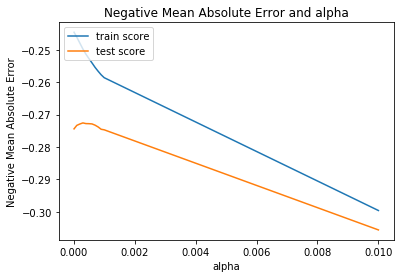

In [2318]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [2319]:
#Choosing the appropriate value of alpha and fitting the lasso regression
alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [2320]:
lasso.coef_

array([ 0.        ,  0.51521838, -0.28348475, -0.28519445, -0.43745645,
        0.13231319,  0.11557723,  0.24687439,  0.11346863, -0.        ,
        0.43762343,  0.38118069,  0.327665  ,  0.40241425, -0.        ,
        0.18230358, -0.12509182,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.76003462,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.35921215, -0.46554403, -0.        ,  0.        ,  0.24992109,
       -0.64240071,  0.        ,  0.26628816, -0.        , -0.6498185 ,
       -0.34747404, -0.58620255, -0.53233416, -0.25124241,  0.        ,
       -0.0797697 ,  0.        , -0.33586778,  0.10705499,  0.22385524,
        0.        ])

In [2321]:
df = pd.DataFrame()
df['Feature Name'] = features
column_name= 'Alpha = %f' % alpha
df[column_name]=sorted(lasso.coef_,reverse=True)
df

,Feature Name,Alpha = 0.001000
0,const,0.515218
1,GrLivArea,0.437623
2,KitchenAbvGr,0.402414
3,Age,0.381181
4,MSSubClass_160,0.359212
5,MSZoning_FV,0.327665
6,MSZoning_RH,0.266288
7,MSZoning_RL,0.249921
8,MSZoning_RM,0.246874
9,LandSlope_Sev,0.223855


In [2322]:
X_train = X_train[['GrLivArea','MSSubClass_160','MSZoning_FV','MSZoning_RH',
                   'MSZoning_RL','MSZoning_RM','Neighborhood_NridgHt','Neighborhood_Somerst',
                   'KitchenAbvGr','Age','LandSlope_Sev','Neighborhood_Crawfor','Neighborhood_StoneBr','Condition2_RRAe']]
X_train = sm.add_constant(X_train)

In [2323]:
lm = sm.OLS(y_train,X_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     286.6
Date:                Tue, 09 Jul 2019   Prob (F-statistic):          2.74e-319
Time:                        18:08:04   Log-Likelihood:                -518.91
No. Observations:                 912   AIC:                             1068.
Df Residuals:                     897   BIC:                             1140.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1949 

In [2324]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [2325]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train = sm.add_constant(X_train)

In [2326]:
# Running the linear model
lm = LinearRegression()
lm = sm.OLS(y_train,X_train).fit()  
print(lm.summary()) 

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     286.6
Date:                Tue, 09 Jul 2019   Prob (F-statistic):          2.74e-319
Time:                        18:08:06   Log-Likelihood:                -518.91
No. Observations:                 912   AIC:                             1068.
Df Residuals:                     897   BIC:                             1140.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1949 

In [2327]:
# Running the RFE with variable selection
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 13)             
rfe = rfe.fit(X_train, y_train)


In [2328]:
rfe.support_

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True])

In [2329]:
# List of variables with the rfe ranking and the rfesupport status
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('const', False, 3),
 ('GrLivArea', True, 1),
 ('MSSubClass_160', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('Neighborhood_NridgHt', True, 1),
 ('Neighborhood_Somerst', True, 1),
 ('KitchenAbvGr', True, 1),
 ('Age', True, 1),
 ('LandSlope_Sev', False, 2),
 ('Neighborhood_Crawfor', True, 1),
 ('Neighborhood_StoneBr', True, 1),
 ('Condition2_RRAe', True, 1)]

In [2330]:
# Storing the variables selected by RFE in col variable
X_train.columns[rfe.support_]

Index(['GrLivArea', 'MSSubClass_160', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_NridgHt',
       'Neighborhood_Somerst', 'KitchenAbvGr', 'Age', 'Neighborhood_Crawfor',
       'Neighborhood_StoneBr', 'Condition2_RRAe'],
      dtype='object')

In [2331]:
#Displaying variables selected by RFE
X_train.columns[~rfe.support_]

Index(['const', 'LandSlope_Sev'], dtype='object')

In [2332]:
X_train_rfe=X_train.columns[rfe.support_]
X_train_rfe.shape

(13,)

In [2333]:
X_train = X_train[X_train_rfe]

In [2334]:
# Adding constant to RFE selected data set
import statsmodels.api as sm  
X_train = sm.add_constant(X_train)

In [2335]:
# Running the linear model
lm = sm.OLS(y_train,X_train).fit()   

In [2336]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     308.7
Date:                Tue, 09 Jul 2019   Prob (F-statistic):          2.24e-320
Time:                        18:08:13   Log-Likelihood:                -519.30
No. Observations:                 912   AIC:                             1067.
Df Residuals:                     898   BIC:                             1134.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1950 

## 8. Residual analysis of the train data

In [2337]:
# Storing the predicted values in the variable y_train_price
y_train_price= lm.predict(X_train)

Text(0.5, 0, 'Errors')

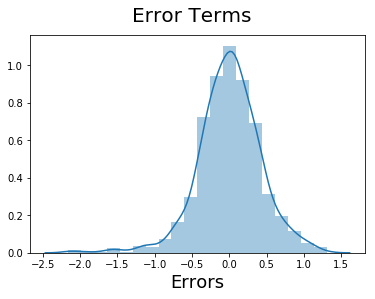

In [2338]:
# Plotting the histogram of the error terms to check if the error terms are normally distributed and centered at zero
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## 9.Making predictions using the final model

In [2339]:
# Applying standard scaler to all the numeric columns of leads data set
num_vars = ['LotFrontage', 'LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch','SalePrice','Age','AgeRemod','AgeGarage']
houses_test[num_vars] = scaler.transform(houses_test[num_vars])

In [2340]:
houses_test.describe()

,LotFrontage,LotArea,Street,Utilities,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12
count,392.000000,392.000000,392.000000,392.0,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,...,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,-0.041910,0.012921,0.992347,1.0,6.053571,5.548469,0.041644,-0.074451,0.032928,0.049340,...,0.066327,0.091837,0.127551,0.196429,0.160714,0.084184,0.043367,0.066327,0.048469,0.043367
std,1.085349,1.022382,0.087258,0.0,1.426705,1.064516,1.139211,0.954642,1.115629,1.027185,...,0.249170,0.289164,0.334016,0.397804,0.367737,0.278018,0.203943,0.249170,0.215030,0.203943
min,-2.492760,-1.709576,0.000000,1.0,1.000000,1.000000,-0.584222,-1.030216,-0.234891,-1.326859,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.621202,-0.556856,1.000000,1.0,5.000000,5.000000,-0.584222,-1.030216,-0.234891,-0.692955,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.101325,-0.132611,1.000000,1.0,6.000000,5.000000,-0.584222,-0.211203,-0.234891,-0.163752,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.418553,0.338815,1.000000,1.0,7.000000,6.000000,0.356964,0.576439,-0.234891,0.565181,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,12.531693,6.360036,1.000000,1.0,10.000000,9.000000,8.769181,3.236271,6.928993,3.990202,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [2341]:
# Dividing the test data set into x and y
y_test = houses_test.pop('SalePrice')
X_test = houses_test

In [2342]:
# Adding constant variable to test dataframe
X_test = X_test.filter(['const','GrLivArea','KitchenAbvGr','MSZoning_FV','MSZoning_RH','MSZoning_RL',
                        'Neighborhood_Somerst','MSSubClass_160','MSZoning_RM','Neighborhood_StoneBr',
                        'Age','Neighborhood_Crawfor','Neighborhood_NridgHt','Condition2_RRAe'],axis=1)
X_test= sm.add_constant(X_test)

In [2343]:
# Making predictions using the final model
y_pred = lm.predict(X_test)

Text(0, 0.5, 'y_pred')

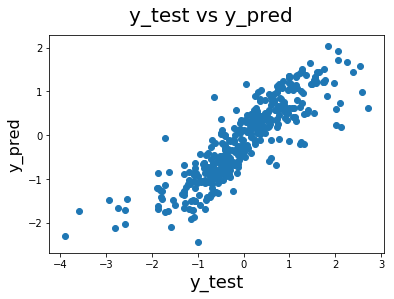

In [2344]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

## 9.Model Evaluation

In [2345]:
# Checking the mean square error and RMSE and R2
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt
lm_mse = mean_squared_error(y_test, y_pred)
lm_rmse =sqrt(mean_squared_error(y_test, y_pred))
lm_r_squared = r2_score(y_test, y_pred) 
print('MSE :' ,lm_mse)
print('RMSE :',lm_rmse)
print('R2 :',lm_r_squared)

MSE : 0.25921438594918894
RMSE : 0.5091310105947082
R2 : 0.7454505885904534


##### The scatter plot between the actual and predicted values of the test data set is linear with almost constant variance.
##### The RMSE an MSE and the overall statistics of the model are good.

### The optimal values of lambda for ridge and lasso regression are:

##### Ridge: 100
##### Lasso: 0.001

### The  top factors effecting sale price are :

##### GrLivArea
##### MSSubClass_160
##### MSZoning_FV
##### MSZoning_RH
##### MSZoning_RL
##### MSZoning_RM
##### Neighborhood_NridgHt
##### Neighborhood_Somerst
##### KitchenAbvGr
##### Age
##### Neighborhood_Crawfor
##### Neighborhood_StoneBr
##### Condition2_RRAe
 

### Equation : 

##### Sale Price = 0.6084*GrLivArea-.6374*MSSubClass_160+0.5941*MSZoning_FV+0.5044*MSZoning_RH                +0.7346*MSZoning_RL+0.6479*MSZoning_RM+0.6335*Neighborhood_NridgHt             +0.4197*Neighborhood_Somerst0.5651*KitchenAbvGr-.4031*Age+0.5299*Neighborhood_Crawfor+0.6151*Neighborhood_StoneBr-0.4653*Condition2_RRAe